In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
#add "affair" column: 1 represents having affairs, 0 represents not 
data['Affair'] = (data.affairs >0).astype(int)
y, X = dmatrices('Affair ~ rate_marriage + age + yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',data, return_type="dataframe")
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [4]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [5]:
X = X.drop(["Intercept"], axis=1)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 16 columns):
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
dtypes: float64(16)
memory usage: 845.5 KB


In [7]:
X.isnull().sum()

occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

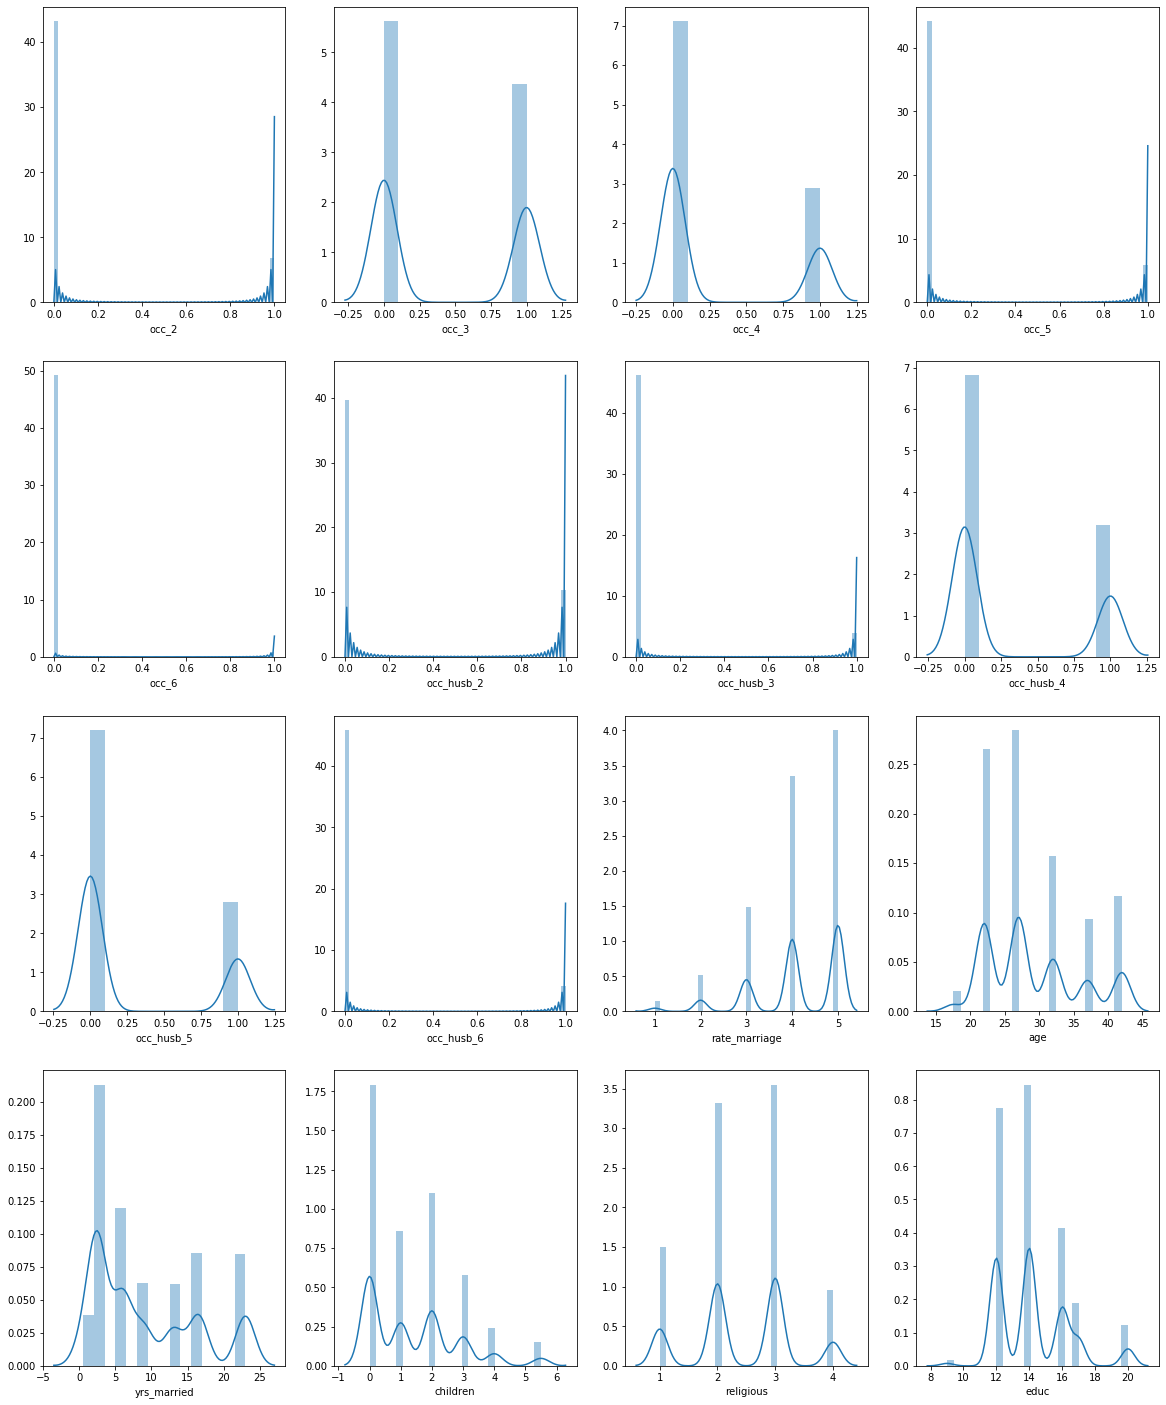

In [8]:
import seaborn as sns
plt.figure(figsize=(20,25))
plot=1
for i in X.columns:
    if plot<17:
        ax=plt.subplot(4,4,plot)
        sns.distplot(X[i])
        plt.xlabel(i)
    plot+=1

In [9]:
X

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [10]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [11]:
p = X
p["Affair"] = data["Affair"]

<Figure size 1440x1800 with 0 Axes>

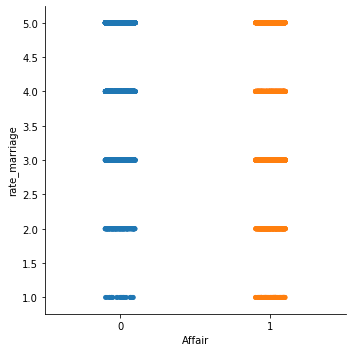

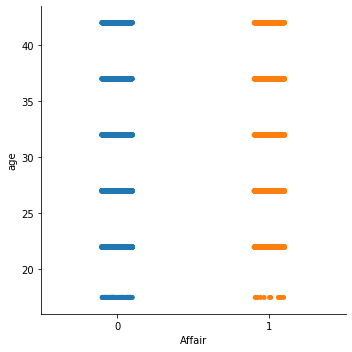

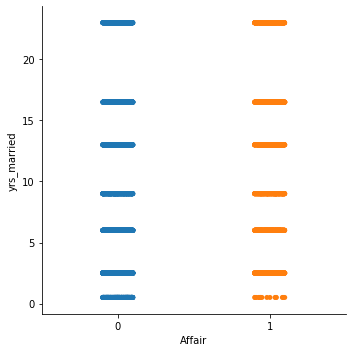

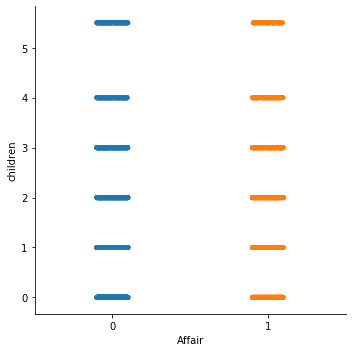

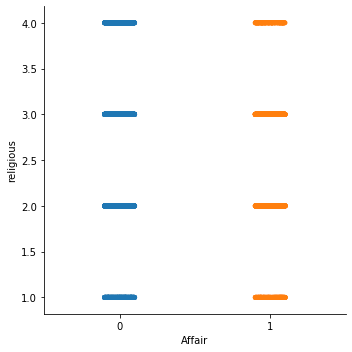

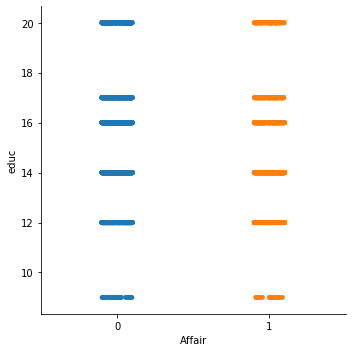

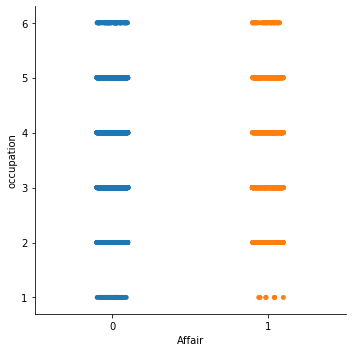

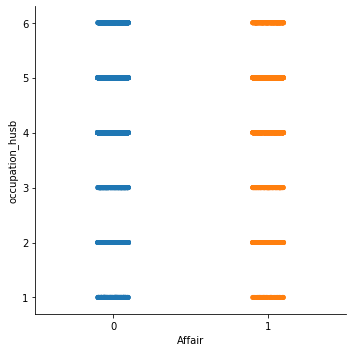

In [12]:
plt.figure(figsize=(20,25))
plot=1
for i in data.columns:
    if plot<9:
        sns.catplot(x="Affair", y=i, order=[0, 1], data=data)
        plt.xlabel("Affair")
    plot+=1

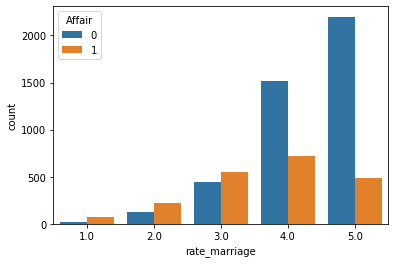

In [13]:
sns.countplot('rate_marriage', hue='Affair', data=data)

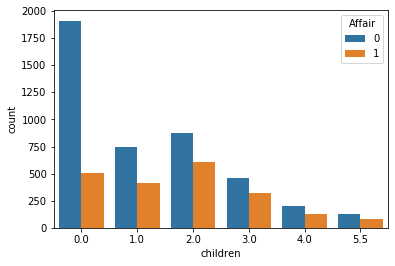

In [14]:
sns.countplot('children',hue='Affair',data=data)

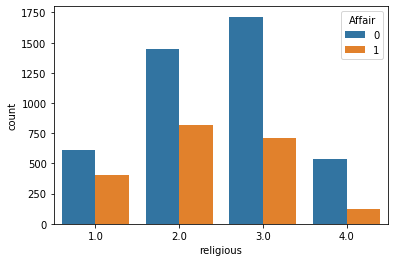

In [15]:
sns.countplot('religious',hue='Affair',data=data)

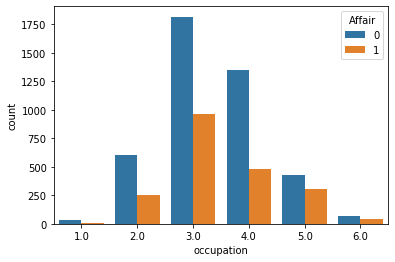

In [16]:
sns.countplot('occupation',hue='Affair',data=data)

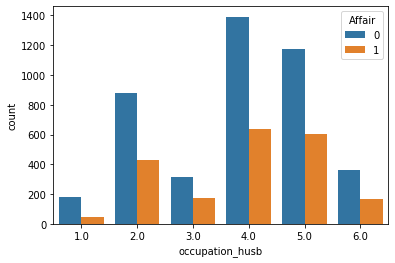

In [17]:
sns.countplot('occupation_husb',hue='Affair',data=data)

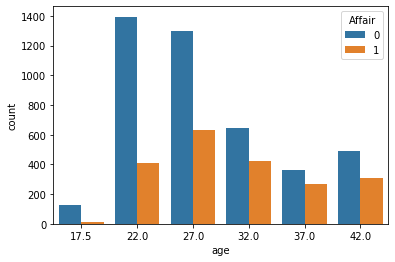

In [18]:
sns.countplot('age',hue='Affair',data=data)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
cross_val_score(classifier,X_train,y_train,cv=10,scoring='accuracy').mean()

1.0

In [25]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[849   0]
 [  0 425]]


1.0